In [40]:
from qiskit_ibm_transpiler.transpiler_service import TranspilerService
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCZGate
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasisTranslator
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeKyiv, FakeTorino
from qiskit_aer.noise import NoiseModel

In [6]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="5f1e04bf1953456e1bdb52606564bbcc1c6da1526599ce9a52c58e4d07365fdddaf2f8d258aabe89f6998db85fee871bd59de3cc5db8e6833a03c12fe80d02dd", overwrite=True)

In [32]:
backend_ecr = FakeKyiv()
pass_manager_ecr = generate_preset_pass_manager(optimization_level=3, backend = backend_ecr)

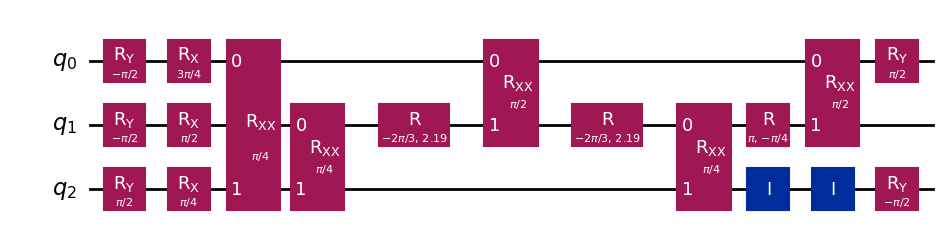

In [77]:
PI = np.pi
P = np.arcsin(np.sqrt(2/3))
qc = QuantumCircuit(3)

# qc.x(2)
qc.ry(-PI / 2, 0)
qc.ry(-PI / 2, 1)
qc.ry(PI / 2, 2)

qc.rx(3*PI / 4, 0)
qc.rx(PI / 2, 1)
qc.rx(PI / 4, 2)

qc.rxx(PI / 4, 0, 2)

qc.rxx(PI / 4, 1, 2)

qc.r(-2*PI / 3, PI-P, 1)

qc.rxx(PI / 2, 0, 1)

qc.r(-2*PI / 3, PI - P, 1)
qc.rxx(PI / 4, 1, 2)
qc.r(PI, -PI / 4, 1)
qc.rxx(PI / 2, 0, 1)
qc.id(2)
qc.id(2)
qc.ry(PI / 2, 0)
qc.ry(-PI / 2, 2)
# qc.x(2)

# qc.measure_all()

# qc2.save_statevector(label='psi_out')
qc.draw("mpl")

In [78]:
transpiled_qc_ecr = pass_manager_ecr.run(qc)

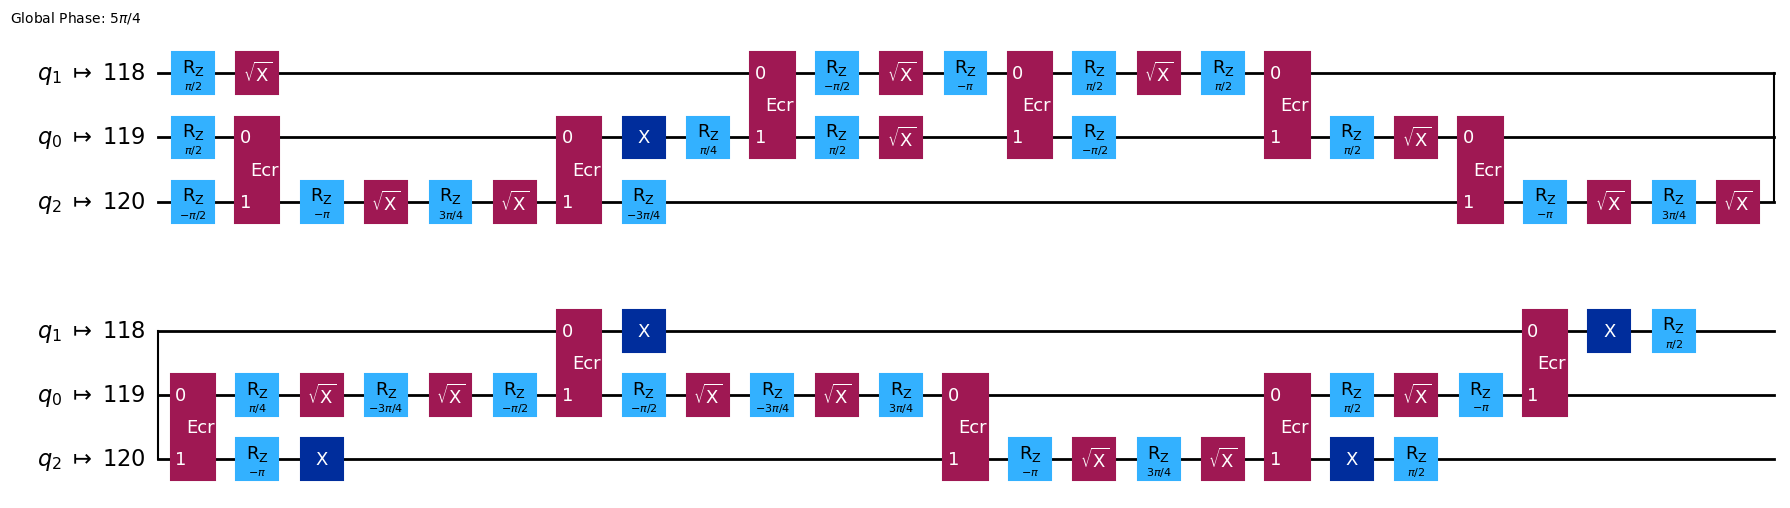

In [79]:
transpiled_qc_ecr.draw("mpl", idle_wires=False)

In [80]:
backend_cz = FakeTorino()
pass_manager_cz = generate_preset_pass_manager(optimization_level=3, backend = backend_cz)

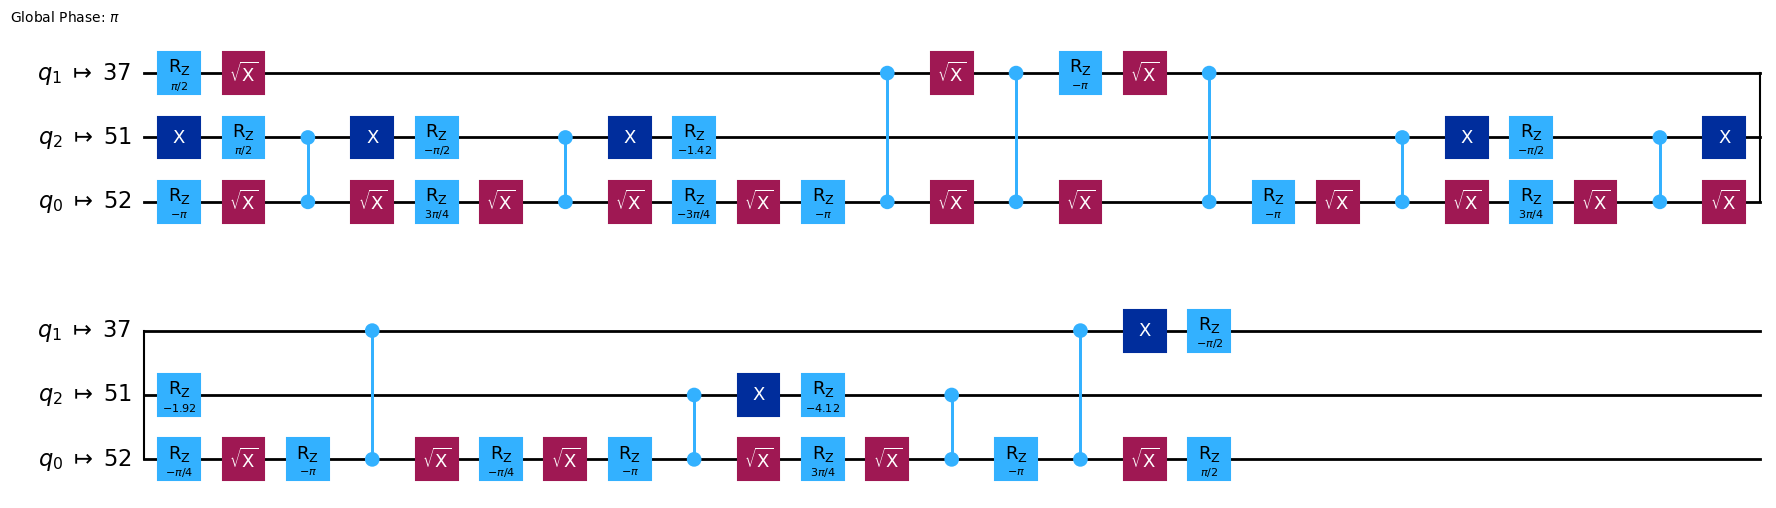

In [81]:
transpiled_qc_cz = pass_manager_cz.run(qc)
transpiled_qc_cz.draw("mpl", idle_wires=False)


In [82]:
ecr_noise = NoiseModel.from_backend(backend_ecr)
cz_noise = NoiseModel.from_backend(backend_cz)

In [83]:
simulator = AerSimulator()

In [84]:
result_ecr = simulator.run(transpiled_qc_ecr, noise_model=ecr_noise).result()

In [85]:
for q1 in range(2):
    for q2 in range(2):
        for q3 in range(2):
            transpiled_qc_ecr.reset(0)
            transpiled_qc_ecr.initialize([q1, 1-q1], 0)
            transpiled_qc_ecr.initialize([q2, 1-q2], 1)
            transpiled_qc_ecr.initialize([q3, 1-q3], 2)
            result_ecr = simulator.run(transpiled_qc_ecr, noise_model=ecr_noise).result()
            print(f"initialized {q1}, {q2}, {q3}", result_ecr.get_counts())



QiskitError: 'No counts for experiment "0"'

In [89]:
print(qc.depth())
print(transpiled_qc_cz.depth())
print(transpiled_qc_ecr.depth())

11
42
49
